In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.express as ex

In [2]:
df = pd.read_csv('dataset_stroke.csv')

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
missing_df = (df.isnull().sum()*100)/df.shape[0]
print(missing_df[missing_df>0])

bmi    3.933464
dtype: float64


In [9]:
# sns.countplot(df=df, x='gender');
print("% of Females: {:.2f}".format((df[df['gender']=="Male"].shape[0]*100)/df.shape[0]))
print("% of Males: {:.2f}".format((df[df['gender']=="Female"].shape[0]*100)/df.shape[0]))
print("% of Other Genders: {:.2f}".format((df[df['gender']=="Other"].shape[0]*100)/df.shape[0]))

% of Females: 41.39
% of Males: 58.59
% of Other Genders: 0.02


Mean Age: 43.226614481409015
Median Age: 45.0


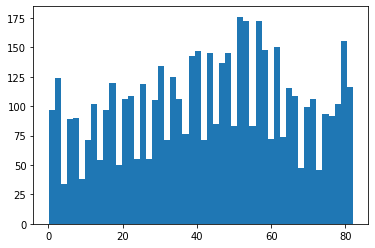

In [10]:
plt.hist(df['age'].values, bins=50);
print("Mean Age: {}".format(df['age'].mean()))
print("Median Age: {}".format(df['age'].median()))

In [33]:
stroke_population = df.query('stroke ==1').copy()

fig = make_subplots(rows=1, cols=1,subplot_titles=('<b>Proportion Of Married Individuals<b>'), vertical_spacing=0.09, specs=[[{"type": "pie","rowspan": 1}]                                    
]
)




In [30]:
fig.add_trace(go.Pie(values=stroke_population.ever_married.value_counts().values,labels=['<b>Yes<b>','<b>No<b>'],hole=0.3,pull=[0,0.08],marker_colors=['wheat','black'],textposition='inside'), row=1, col=1)

In [98]:
casados = len(df[df.ever_married == 'Yes'])

In [99]:
casados

3353

In [100]:
solteiros = len(df[df.ever_married == 'No'])

In [101]:
solteiros

1757

In [107]:
axis1.pie(, labels=solteiros, autopct='%1.1f%%', shadow=True, startangle=90)

TypeError: ignored

In [115]:
fig = ex.pie(df, names='ever_married')
fig.show()

In [116]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [121]:
fig = ex.pie(df, names='Residence_type')
fig.show()

In [122]:
fig = ex.pie(df, names='work_type')
fig.show()